In [10]:
# for mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
#Tensorflow Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Activation,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [12]:
data_path = '/content/drive/My Drive/Datasets/Data sets images/COVID 19 Project'


categories = os.listdir(data_path)#listing the directories or folders insede the file path
label = [i for i in range(len(categories))] # Numerical labels in category
category_dictionary = {} # for holding the mapping values from numeraical to category 
dictionary={}# Mapping

for i in range(len(label)):
    category_dictionary[i] = categories[i]
    dictionary[categories[i]] = i

    
# Printing data inside variable
print("Category: ",categories)
print("Labels: ",label)
print("Category Dictionary: ",category_dictionary)
print("Dictionary: ",dictionary)

Category:  ['COVID 19', 'NORMAL']
Labels:  [0, 1]
Category Dictionary:  {0: 'COVID 19', 1: 'NORMAL'}
Dictionary:  {'COVID 19': 0, 'NORMAL': 1}


In [13]:
def glance(cls,num):
    
    temp = os.listdir(data_path +'/'+ categories[cls] )[num]# this gets the image name in directory    
    img_path = data_path +'/'+ categories[cls]+'/'+ temp # image path within direcory
    image = plt.imread(img_path) #reads image
    plt.imshow(image) # shows or prints image
    
    print("Shape of Image:",image.shape)

Normal Chest X ray
Shape of Image: (1024, 1024)


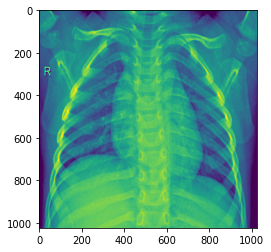

In [14]:
print("Normal Chest X ray")
glance(1,16)

Corona Affected Chest
Shape of Image: (452, 432, 3)


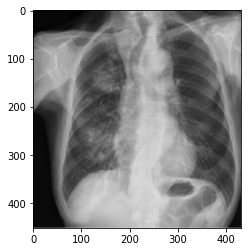

In [15]:
print("Corona Affected Chest")
glance(0,10)

In [16]:
def mean_dimension_500(cls):
    dim1 = []
    dim2 = []
    path = data_path +'/'+ categories[cls]
    images_name = os.listdir(path)
    
    print('Calculating, Kindly Wait For Some Minutes.....')
    img=''

    for i in images_name[300:800]:
        
        path_img = path + '/' + i 
        img = plt.imread(path_img)
        d1,d2 = img.shape[:2]
        dim1.append(d1)
        dim2.append(d2)

    
    sns.jointplot(dim1,dim2)
    plt.show()
        
    print("Img Max:",img.max())
    print("Img Min:",img.min())
    
    print("dim1 mean:",np.mean(dim1))
    print("dim2 mean:",np.mean(dim2))

    print("Last Image's shape:",img.shape)
    
    
    
    return dim1,dim2
    


Calculating, Kindly Wait For Some Minutes.....


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


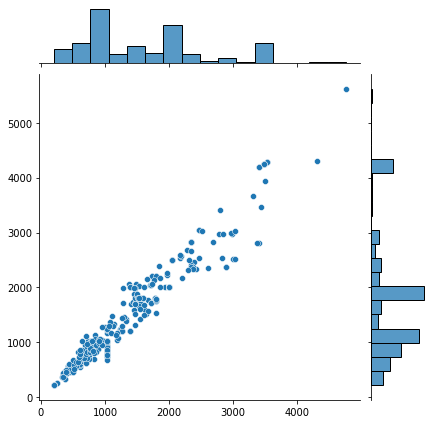

Img Max: 255
Img Min: 0
dim1 mean: 1569.99
dim2 mean: 1717.55
Last Image's shape: (1024, 1024, 3)


In [17]:
dim1,dim2 = mean_dimension_500(0)


In [18]:
### Image data For Training Neural Network

Actual (1024, 1024, 3)


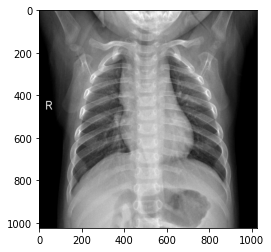

Gray (1024, 1024)


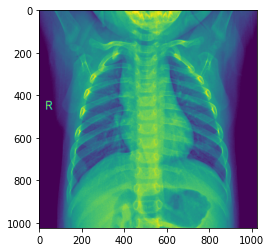

In [19]:
# checking temporarily, whether it is going to work or not
temp_path = data_path +'/'+ categories[1]
img_name_temp = os.listdir(temp_path)[1]

img_temp = cv2.imread(temp_path + '/' + img_name_temp)
print("Actual",img_temp.shape)
plt.imshow(img_temp)
plt.show()



img_temp = cv2.cvtColor(img_temp,cv2.COLOR_BGR2GRAY)
print("Gray",img_temp.shape)
plt.imshow(img_temp)
plt.show()



In [20]:
image_data_x = []
category_y = []
dim = (int(np.mean(dim1)),int(np.mean(dim2)))
print(dim,type(dim))

(1569, 1717) <class 'tuple'>


In [21]:
for i in categories:
    for j in os.listdir(data_path +'/'+ i):
        path_trace = data_path +'/'+ i+'/'+j
        img = cv2.imread( path_trace )
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)    
        img = cv2.resize(img,(200,200)) 
        image_data_x.append(img)
        category_y.append(dictionary[i])

In [22]:
# Getting to know shape
image_data_x = np.array(image_data_x)
category_y   = np.array(category_y)

image_data_x.shape,category_y.shape

((2579, 200, 200), (2579,))

0


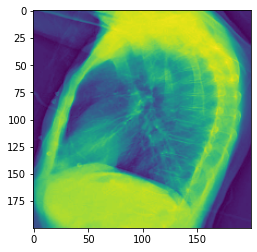

In [23]:

print(category_y[18])
plt.imshow(image_data_x[18])

In [25]:
# splitting data to train and test
image_data_x = image_data_x.reshape(-1,200,200,1)
x_train,x_test,y_train,y_test = train_test_split(image_data_x,category_y, test_size = 0.2,random_state=42)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [26]:
def shape():
    print("train,test,cat")
    print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,y_train_cat.shape,y_test_cat.shape)
    
shape()

train,test,cat
(2063, 200, 200, 1) (2063,) (516, 200, 200, 1) (516,) (2063, 2) (516, 2)


In [44]:
### Building Sequential model
model =  Sequential()

model.add(Conv2D(filters=64,kernel_size = (2,2),padding = 'same',activation = 'relu',input_shape=(200,200,1)))
model.add(Conv2D(filters=128,kernel_size = (2,2),padding = 'same',activation = 'relu'))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128,kernel_size = (2,2),padding = 'same',activation = 'relu'))
model.add(Conv2D(filters=128,kernel_size = (2,2),padding = 'same',activation = 'relu'))
model.add(Dropout(0.5))

model.add(Conv2D(filters=256,kernel_size = (2,2),padding = 'same',activation = 'relu'))
model.add(Dropout(0.4))

model.add(Conv2D(filters=64,kernel_size = (2,2),padding = 'same',activation = 'relu'))
model.add(Dropout(0.5))

model.add(Flatten())


model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(optimizer = 'adam',loss='categorical_crossentropy', metrics=['accuracy'])

es =  EarlyStopping(monitor='val_loss', patience=10, mode='min')

In [43]:
MC=ModelCheckpoint(
    filepath='/content/drive/My Drive/Datasets/Data sets images/COVID 19 Project/Model_checkpoints', 
    monitor='val_loss', 
    verbose=0, 
    save_best_only=True,
    save_weights_only=False, 
    mode='min', 
    save_freq='epoch', 
    options=None, 
)

In [42]:
help(ModelCheckpoint)

Help on class ModelCheckpoint in module tensorflow.python.keras.callbacks:

class ModelCheckpoint(Callback)
 |  Callback to save the Keras model or model weights at some frequency.
 |  
 |  `ModelCheckpoint` callback is used in conjunction with training using
 |  `model.fit()` to save a model or weights (in a checkpoint file) at some
 |  interval, so the model or weights can be loaded later to continue the training
 |  from the state saved.
 |  
 |  A few options this callback provides include:
 |  
 |  - Whether to only keep the model that has achieved the "best performance" so
 |    far, or whether to save the model at the end of every epoch regardless of
 |    performance.
 |  - Definition of 'best'; which quantity to monitor and whether it should be
 |    maximized or minimized.
 |  - The frequency it should save at. Currently, the callback supports saving at
 |    the end of every epoch, or after a fixed number of training batches.
 |  - Whether only weights are saved, or the whol

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 200, 200, 64)      320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 200, 200, 128)     32896     
_________________________________________________________________
dropout_12 (Dropout)         (None, 200, 200, 128)     0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 200, 200, 128)     65664     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 200, 200, 128)     65664     
_________________________________________________________________
dropout_13 (Dropout)         (None, 200, 200, 128)     0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 200, 200, 256)    

In [46]:
model.fit(x=x_train,y=y_train_cat,epochs=300,callbacks=[es,MC],validation_data=(x_test,y_test_cat),batch_size=(16))

Epoch 1/300
129/129 [==============================] - ETA: 0s - loss: 28.5296 - accuracy: 0.8333WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Datasets/Data sets images/COVID 19 Project/Model_checkpoints/assets
129/129 [==============================] - 78s 608ms/step - loss: 28.5296 - accuracy: 0.8333 - val_loss: 0.2881 - val_accuracy: 0.8992
Epoch 2/300
129/129 [==============================] - 77s 593ms/step - loss: 0.2561 - accuracy: 0.9098 - val_loss: 0.2892 - val_accuracy: 0.9186
Epoch 3/300
129/129 [==

In [47]:
predictions = model.predict_classes(x_test)

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       259
           1       0.98      0.93      0.95       257

    accuracy                           0.95       516
   macro avg       0.95      0.95      0.95       516
weighted avg       0.95      0.95      0.95       516



In [49]:
confusion_matrix(y_test,predictions)

array([[254,   5],
       [ 19, 238]])

Original Label:  NORMAL
Predicted Label:  NORMAL


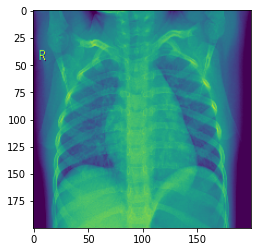

In [54]:
#Testing model with data
def testing_model(num):
  if num < len(x_test):
    original_label = category_dictionary[y_test[num]]
    img = x_test[num]
    prediction = model.predict_classes(img.reshape(-1,200,200,1))
    prediction = category_dictionary[prediction[0]]
    print("Original Label: ",original_label)
    print("Predicted Label: ",prediction)

    plt.imshow(img.reshape(200,200))
    plt.show()

  else:
    print("Number given is not Valid, please Enter Valid ones")

testing_model(103)

In [55]:
model.save("/content/drive/My Drive/Datasets/Data sets images/COVID 19 Project/covid19_project.h5")